<a href="https://colab.research.google.com/github/xooseul/NEW-LSTM-GRU-70-30/blob/main/14)_NEW_LSTM_GRU_70_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import seaborn as sns
sns.set_theme(style ="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MYOR.JK.csv', parse_dates = ['Date'], index_col = 'Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,677.140930,689.140869,677.140930,677.140930,600.334229,685418
2013-01-03,668.569519,675.426636,668.569519,668.569519,592.735107,12162534
2013-01-04,668.569519,675.426636,668.569519,668.569519,592.735107,11360449
2013-01-07,668.569519,671.998108,665.140930,668.569519,592.735107,14918792
2013-01-08,666.855225,668.569519,665.140930,666.855225,591.215210,10820864
...,...,...,...,...,...,...
2023-12-21,2400.000000,2400.000000,2330.000000,2330.000000,2330.000000,2905800
2023-12-22,2350.000000,2400.000000,2320.000000,2380.000000,2380.000000,3220400
2023-12-27,2380.000000,2410.000000,2370.000000,2380.000000,2380.000000,5645000


In [4]:
data =  data.drop(['High', 'Open', 'Adj Close', 'Low', 'Volume'], axis = 'columns')
data

,Close
Date,
2013-01-02,677.140930
2013-01-03,668.569519
2013-01-04,668.569519
2013-01-07,668.569519
2013-01-08,666.855225
...,...
2023-12-21,2330.000000
2023-12-22,2380.000000
2023-12-27,2380.000000


# Analisis Deskriptif

In [5]:
data.describe()

,Close
count,2726.000000
mean,1911.849970
std,643.814176
min,661.712402
25%,1188.427735
50%,2050.000000
75%,2480.000000
max,3140.000000


<Axes: xlabel='Date', ylabel='Close'>

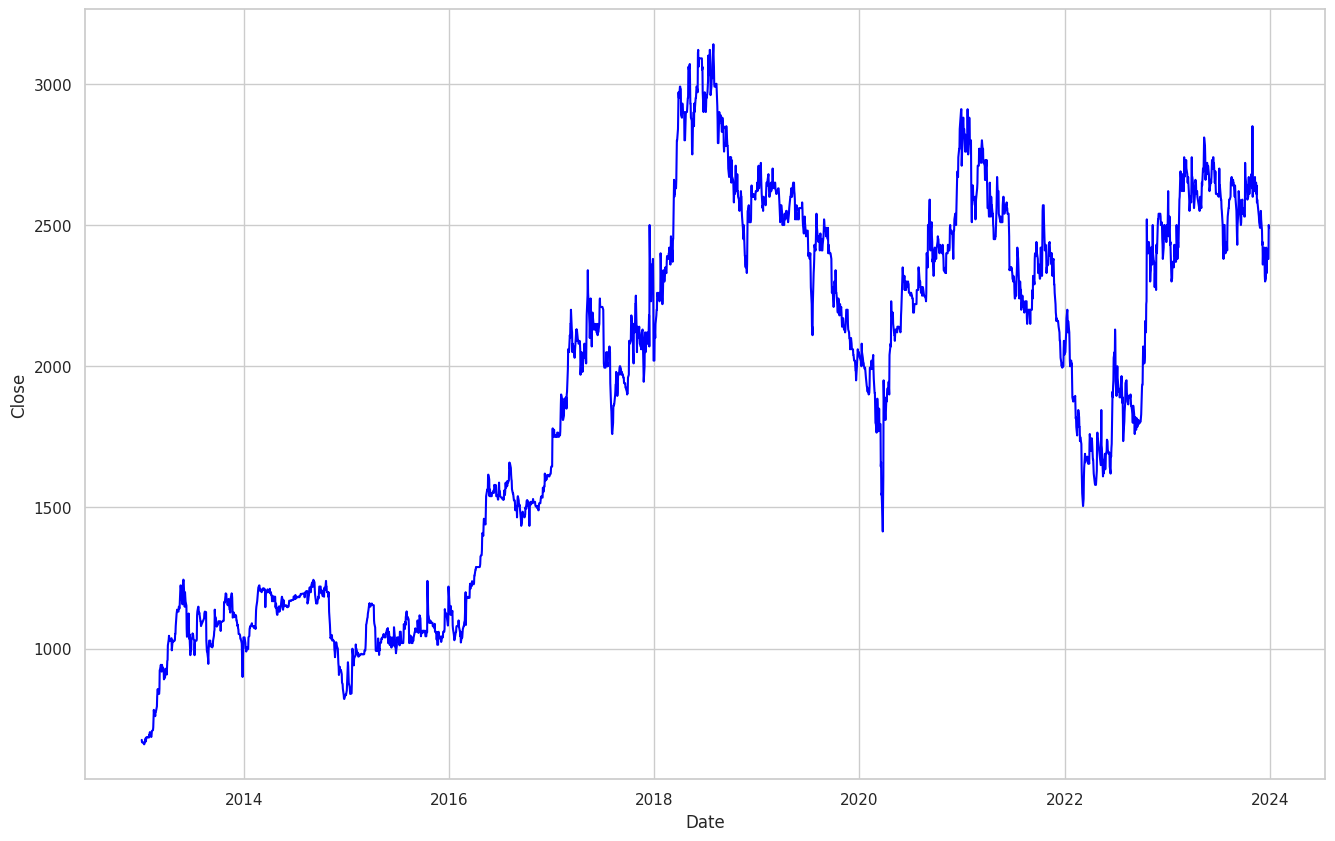

In [6]:
plt.figure(figsize =(16,10))
sns.lineplot(data = data, x='Date', y = 'Close', color ='blue')

# Preprocessing Data

## Pemeriksaan Struktur Data

In [7]:
# Pengecekan data yang hilang
missing_value = data.isna().sum()
print(f"Jumlah data hilang : {missing_value}")

Jumlah data hilang : Close    0
dtype: int64


## Normalisasi Data

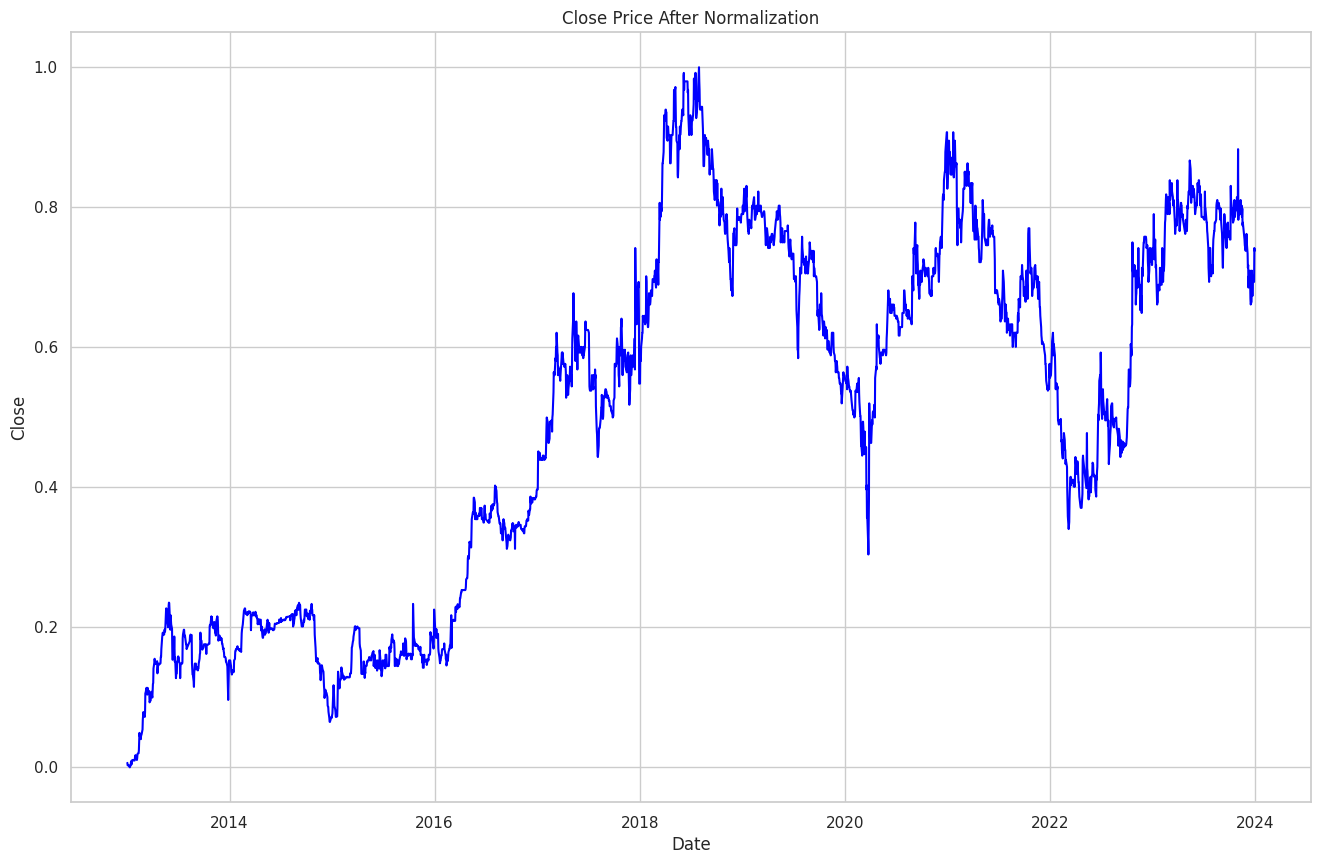

In [8]:
# Normalisasi data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])

# Visualisasi data setelah normalisasi
plt.figure(figsize=(16,10))
sns.lineplot(data=data, x='Date', y='Close', color='blue')
plt.title('Close Price After Normalization')
plt.show()


In [9]:
data['Close']

Date
2013-01-02    0.006225
2013-01-03    0.002767
2013-01-04    0.002767
2013-01-07    0.002767
2013-01-08    0.002075
                ...   
2023-12-21    0.673161
2023-12-22    0.693337
2023-12-27    0.693337
2023-12-28    0.741757
2023-12-29    0.737722
Name: Close, Length: 2726, dtype: float64

## Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train, test = data.iloc[0:train_size], data.iloc[train_size:len(data)]
len(train), len(test)

(1908, 818)

In [11]:
# Convert data to numpy arrays
train_data = train.values
test_data = test.values

# Modelling

In [12]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input menjadie [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1897, 10, 1) (1897,)
(807, 10, 1) (807,)


In [14]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers
from tensorflow.keras.optimizers import Adam

In [15]:
# Define hyperparameters
epochs = 100
learning_rate = 0.0001
neurons = 50

In [16]:
# Create LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(neurons, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(neurons, return_sequences=False))
model_lstm.add(Dense(1))

# Compile the model with Adam optimizer and specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)


Epoch 1/100
60/60 [==============================] - 6s 19ms/step - loss: 0.1275
Epoch 2/100
60/60 [==============================] - 1s 19ms/step - loss: 0.0096
Epoch 3/100
60/60 [==============================] - 1s 16ms/step - loss: 0.0031
Epoch 4/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 5/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 6/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 7/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0010
Epoch 8/100
60/60 [==============================] - 1s 12ms/step - loss: 9.9102e-04
Epoch 9/100
60/60 [==============================] - 1s 12ms/step - loss: 9.7507e-04
Epoch 10/100
60/60 [==============================] - 1s 12ms/step - loss: 9.6026e-04
Epoch 11/100
60/60 [==============================] - 1s 11ms/step - loss: 9.4433e-04
Epoch 12/100
60/60 [==============================] - 1s 12ms/step - loss: 9.2841e-04
Epoch

In [17]:
# Create GRU model
model_gru = Sequential()
model_gru.add(GRU(neurons, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(GRU(neurons, return_sequences=False))
model_gru.add(Dense(1))

optimizer = Adam(learning_rate=learning_rate)
model_gru.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model_gru.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)


Epoch 1/100
60/60 [==============================] - 8s 20ms/step - loss: 0.0907
Epoch 2/100
60/60 [==============================] - 1s 17ms/step - loss: 0.0074
Epoch 3/100
60/60 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 4/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 5/100
60/60 [==============================] - 1s 13ms/step - loss: 9.9785e-04
Epoch 6/100
60/60 [==============================] - 1s 12ms/step - loss: 6.2110e-04
Epoch 7/100
60/60 [==============================] - 1s 12ms/step - loss: 5.3035e-04
Epoch 8/100
60/60 [==============================] - 1s 12ms/step - loss: 5.1598e-04
Epoch 9/100
60/60 [==============================] - 1s 12ms/step - loss: 5.1216e-04
Epoch 10/100
60/60 [==============================] - 1s 12ms/step - loss: 5.1016e-04
Epoch 11/100
60/60 [==============================] - 1s 13ms/step - loss: 5.1025e-04
Epoch 12/100
60/60 [==============================] - 1s 13ms/step - loss: 5.05

In [18]:
import math
from sklearn.metrics import mean_squared_error

# Make predictions
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

26/26 [==============================] - 0s 7ms/step


In [19]:
# Inverse/Denormalisasi
train_predict_lstm = scaler.inverse_transform(train_predict_lstm.reshape(-1, 1))
test_predict_lstm = scaler.inverse_transform(test_predict_lstm.reshape(-1, 1))

train_predict_gru = scaler.inverse_transform(train_predict_gru.reshape(-1, 1))
test_predict_gru = scaler.inverse_transform(test_predict_gru.reshape(-1, 1))

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Evaluation metrics
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, mse, rmse, mape

# Calculate evaluation metrics for training data
mae_train_lstm, mse_train_lstm, rmse_train_lstm, mape_train_lstm = evaluate(y_train_inv, train_predict_lstm)
mae_train_gru, mse_train_gru, rmse_train_gru, mape_train_gru = evaluate(y_train_inv, train_predict_gru)

# Calculate evaluation metrics for testing data
mae_test_lstm, mse_test_lstm, rmse_test_lstm, mape_test_lstm = evaluate(y_test_inv, test_predict_lstm)
mae_test_gru, mse_test_gru, rmse_test_gru, mape_test_gru = evaluate(y_test_inv, test_predict_gru)

print("Evaluation Metrics on LSTM:")
print("LSTM Train : MAE = {:.4f}, MSE = {:.4f}, RMSE = {:.4f}, MAPE = {:.4f}".format(mae_train_lstm, mse_train_lstm, rmse_train_lstm, mape_train_lstm))
print("LSTM Test : MAE = {:.4f}, MSE = {:.4f}, RMSE = {:.4f}, MAPE = {:.4f}".format(mae_test_lstm, mse_test_lstm, rmse_test_lstm, mape_test_lstm))

print("\nEvaluation Metrics on GRU:")
print("GRU Train: MAE = {:.4f}, MSE = {:.4f}, RMSE = {:.4f}, MAPE = {:.4f}".format(mae_train_gru, mse_train_gru, rmse_train_gru, mape_train_gru))
print("GRU Test: MAE = {:.4f}, MSE = {:.4f}, RMSE = {:.4f}, MAPE = {:.4f}".format(mae_test_gru, mse_test_gru, rmse_test_gru, mape_test_gru))

Evaluation Metrics on LSTM:
LSTM Train : MAE = 43.4024, MSE = 3995.3462, RMSE = 63.2088, MAPE = 0.0254
LSTM Test : MAE = 60.0276, MSE = 6511.3059, RMSE = 80.6927, MAPE = 0.0260

Evaluation Metrics on GRU:
GRU Train: MAE = 27.4143, MSE = 1707.4667, RMSE = 41.3215, MAPE = 0.0167
GRU Test: MAE = 39.7982, MSE = 2773.2862, RMSE = 52.6620, MAPE = 0.0175


In [21]:
# Combine actual and predicted values into a DataFrame with dates
results = pd.DataFrame({
    'Date': test.index[:len(y_test_inv)],
    'Actual': y_test_inv.flatten(),
    'LSTM Predictions': test_predict_lstm.flatten(),
    'GRU Predictions': test_predict_gru.flatten()
})

# Display the first few rows of the results
print(results)


          Date  Actual  LSTM Predictions  GRU Predictions
0   2020-08-25  2510.0       2415.200684      2542.206299
1   2020-08-26  2480.0       2440.102539      2536.796143
2   2020-08-27  2410.0       2456.087402      2514.111328
3   2020-08-28  2480.0       2456.916504      2468.461670
4   2020-08-31  2510.0       2457.528809      2473.326416
..         ...     ...               ...              ...
802 2023-12-06  2400.0       2337.040283      2372.667480
803 2023-12-07  2330.0       2336.145264      2394.883057
804 2023-12-08  2380.0       2334.638916      2373.036133
805 2023-12-11  2380.0       2334.641846      2378.161377
806 2023-12-12  2500.0       2336.288086      2384.312744

[807 rows x 4 columns]


In [22]:
# Save the DataFrame to a CSV file
results.to_csv('14) results 70:30.csv', index=False)

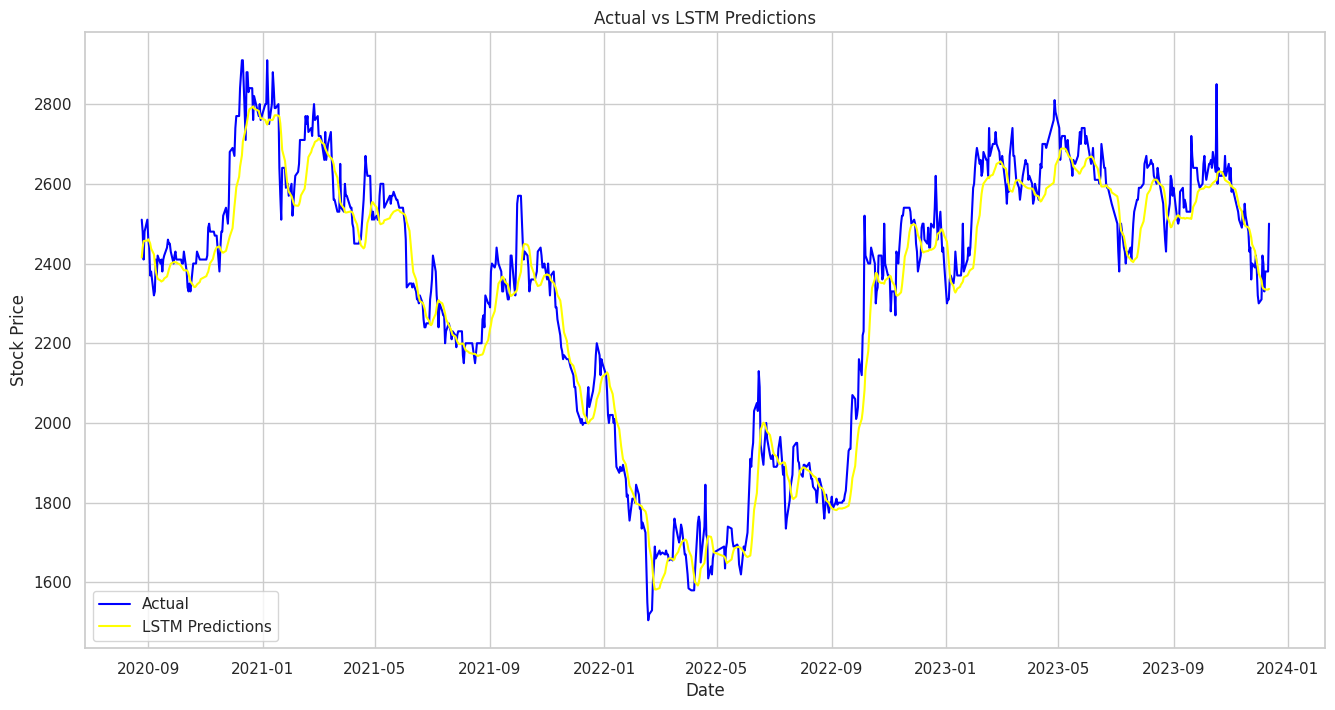

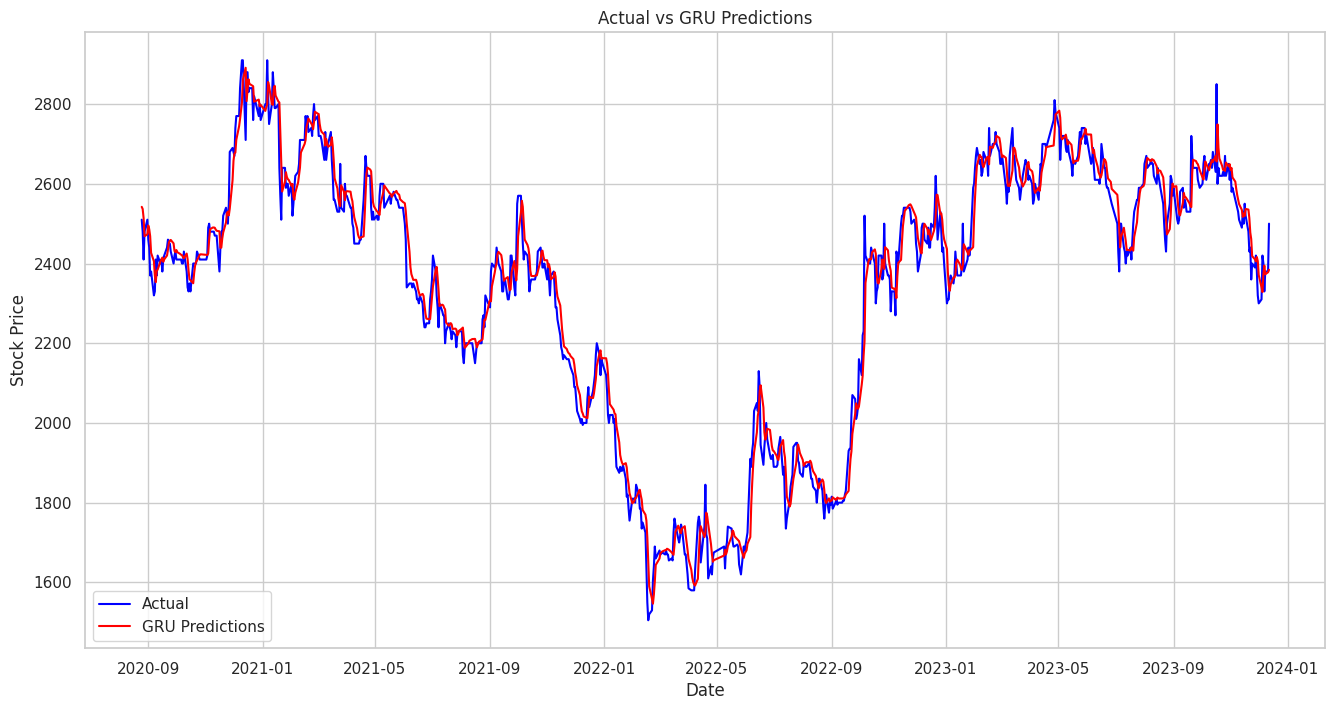

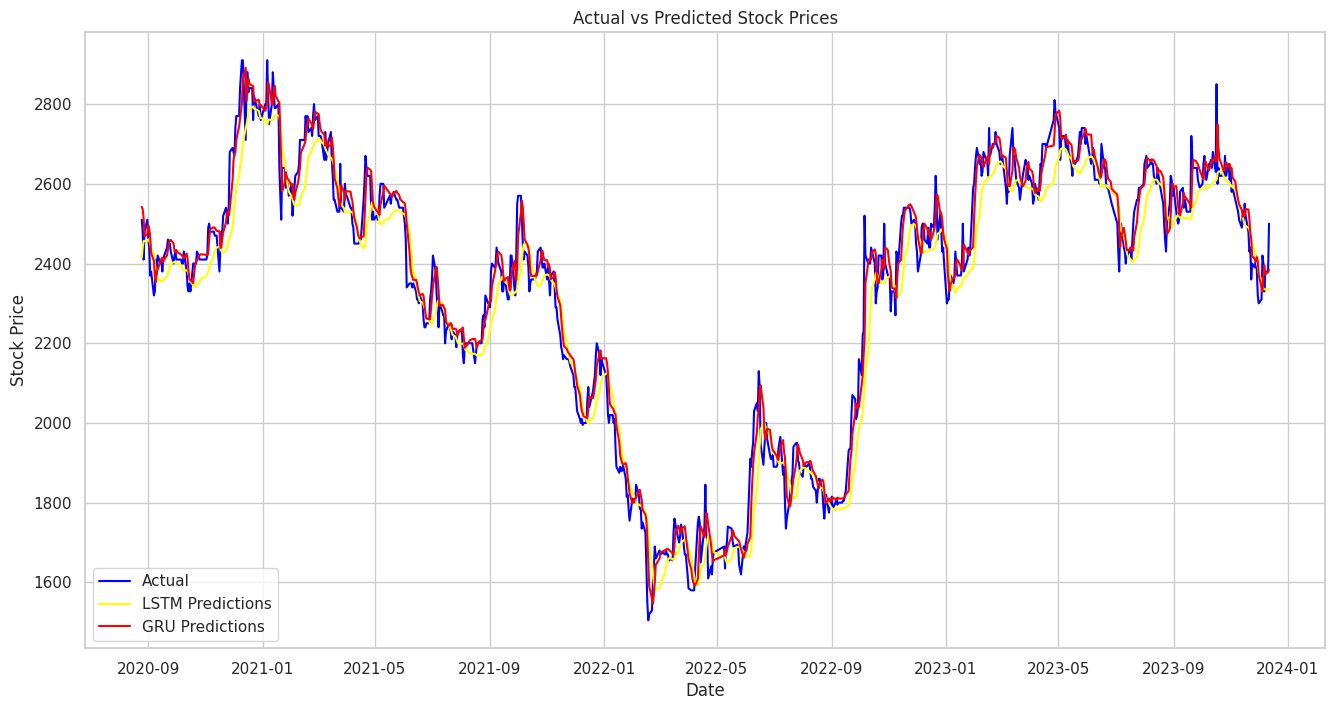

In [23]:
# LSTM
plt.figure(figsize=(16, 8))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['LSTM Predictions'], label='LSTM Predictions', color='yellow')

plt.title('Actual vs LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# GRU
plt.figure(figsize=(16, 8))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['GRU Predictions'], label='GRU Predictions', color='red')

plt.title('Actual vs GRU Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#Gabung
plt.figure(figsize=(16, 8))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['LSTM Predictions'], label='LSTM Predictions', color='yellow')
plt.plot(results['Date'], results['GRU Predictions'], label='GRU Predictions', color='red')

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
